In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#pip install seaborn

In [3]:
path = '/Users/gwynethvolkmann/Desktop/datascience/Unit 11'
os.chdir(path) 

In [4]:
os.getcwd()

'/Users/gwynethvolkmann/Desktop/datascience/Unit 11'

In [5]:
df = pd.read_csv('heart_failure_data.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [8]:
df['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [9]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:>

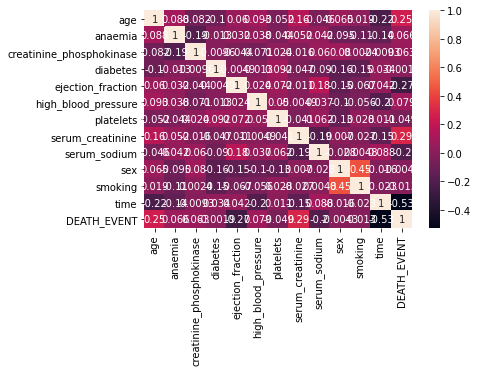

In [11]:
sns.heatmap(df.corr(), annot=True)

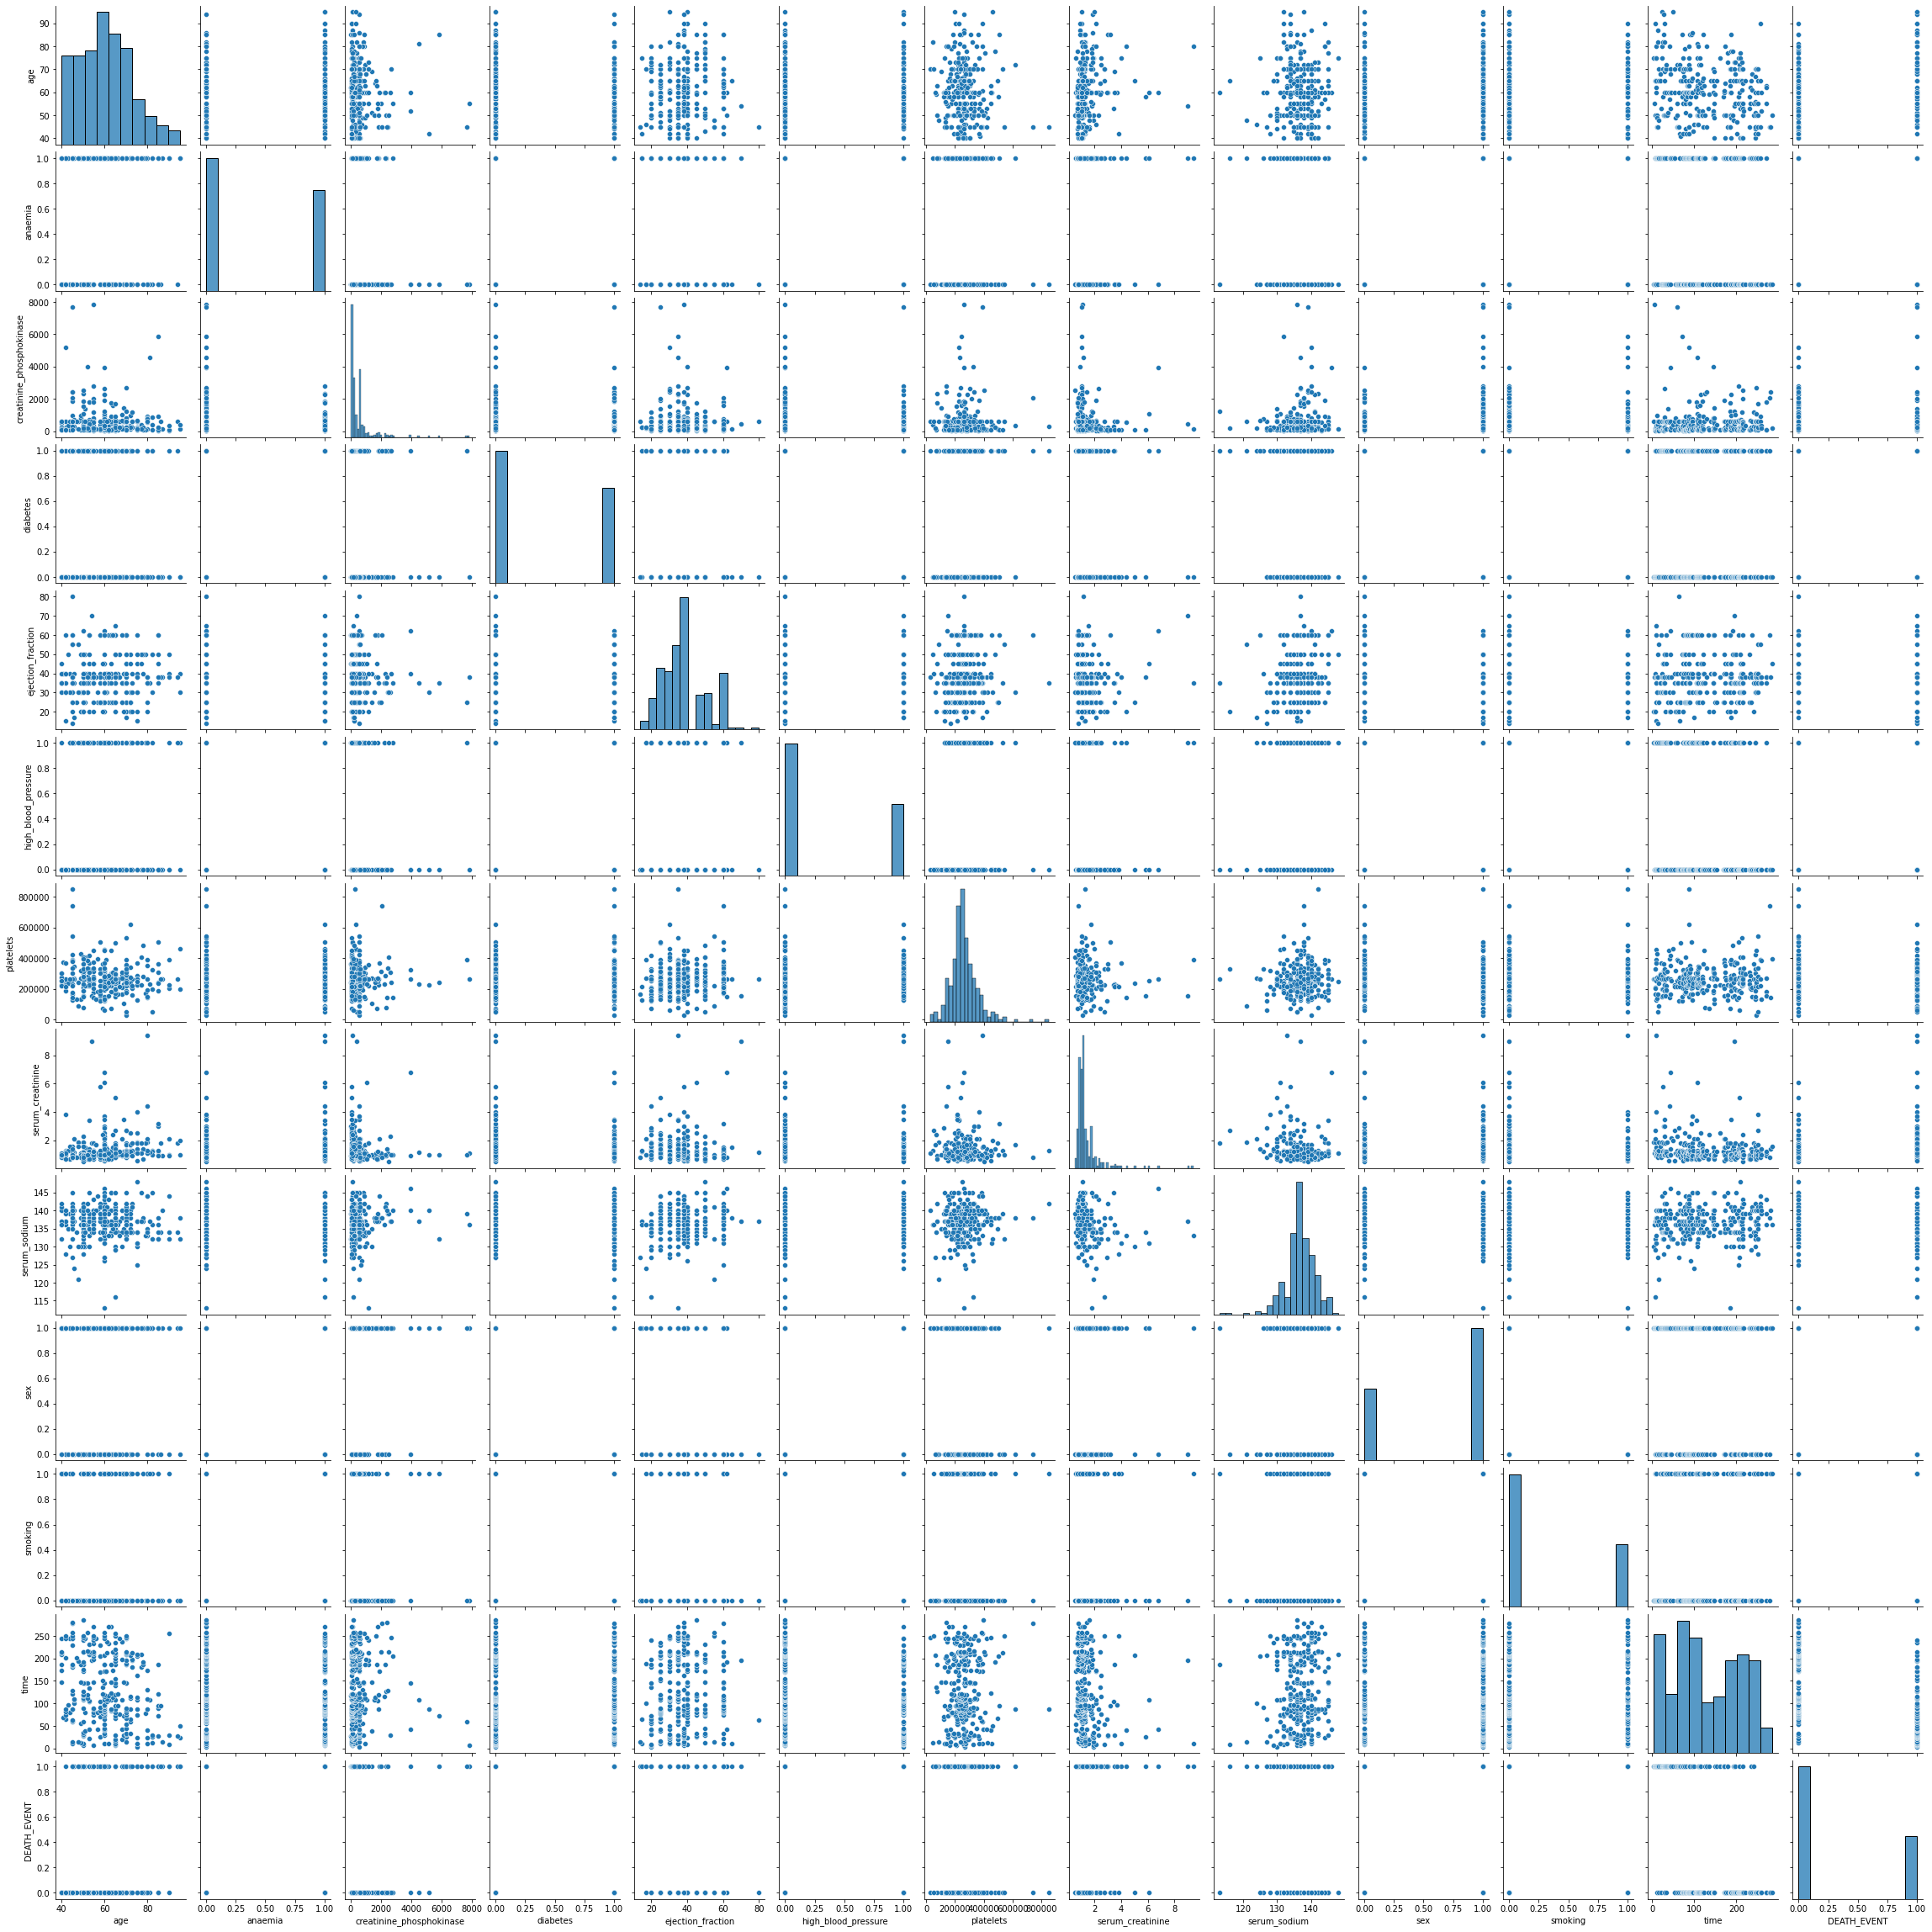

In [12]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

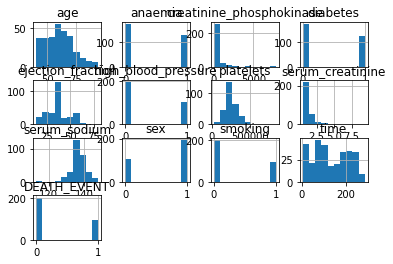

In [13]:
df.hist()

Correlation between various features


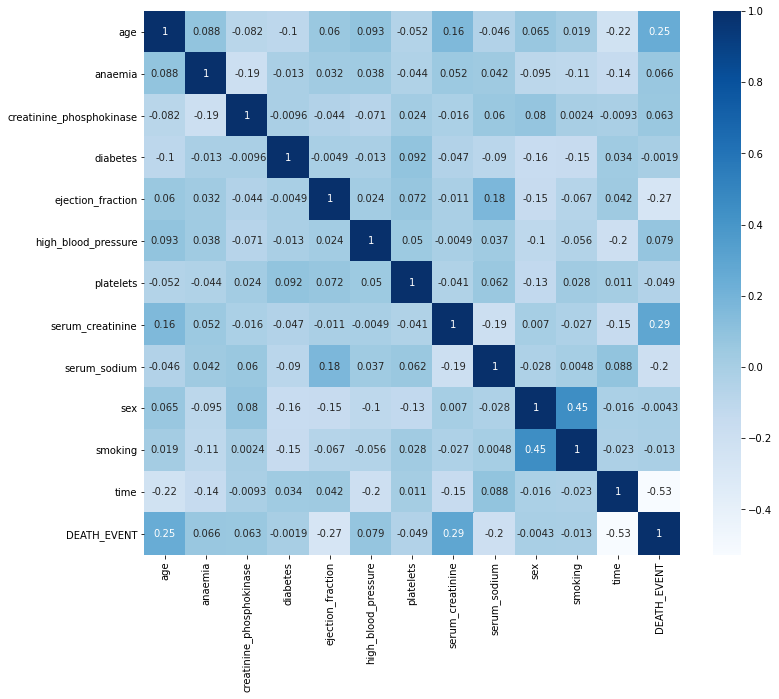

In [14]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')

The death event variable seems to be correlated with the age variable and the serum_creatinine variables most closely.

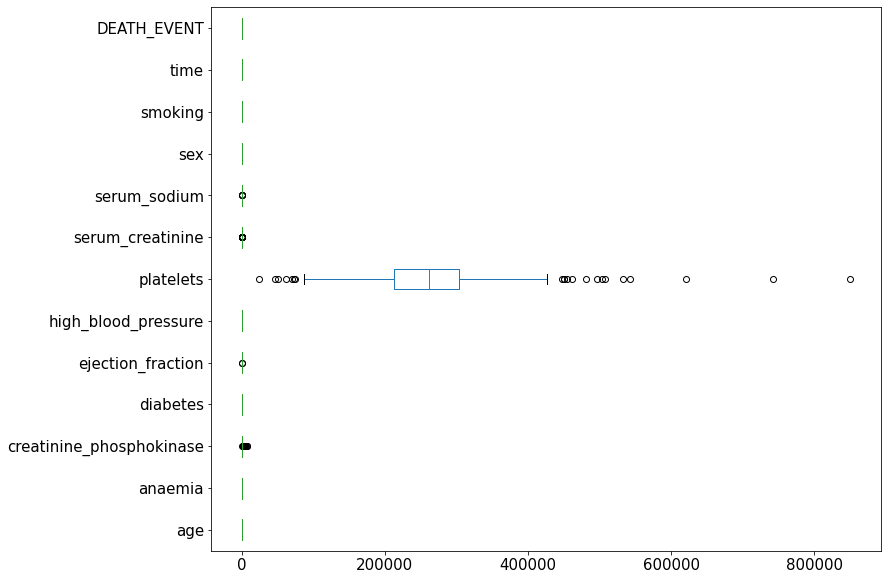

In [15]:
boxplot = df.boxplot(grid=False, vert=False, fontsize=15, figsize=(12,10))

This box plot make it clear that the platelets variable will bee to be normalized so the data can be analyzed
on the same scale. 

In [16]:
df2 = df.drop(['platelets'], axis=1)

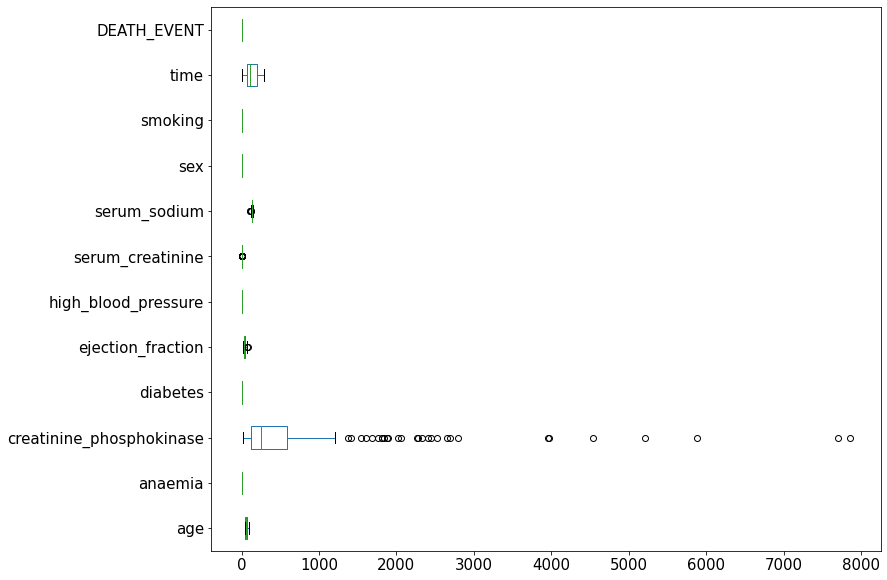

In [17]:
boxplot = df2.boxplot(grid=False, vert=False, fontsize=15, figsize=(12,10))

The creatinine_phosphokinase variable will also need to be normalized in order to analyze data at the same scale.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

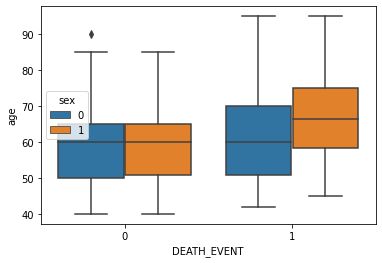

In [18]:
sns.boxplot(x= 'DEATH_EVENT', y='age', hue='sex', data = df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

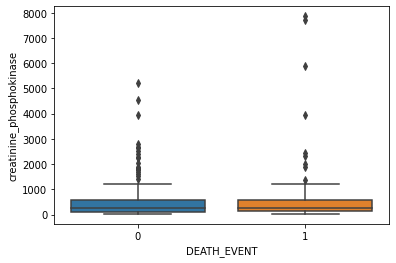

In [19]:
sns.boxplot(x= 'DEATH_EVENT', y='creatinine_phosphokinase', data = df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

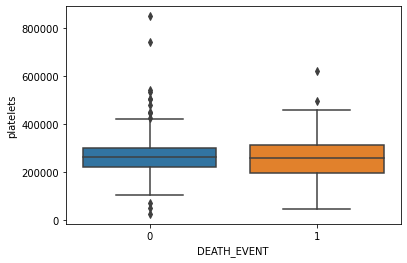

In [20]:
sns.boxplot(x= 'DEATH_EVENT', y='platelets', data = df)

Text(0, 0.5, 'Number of patients')

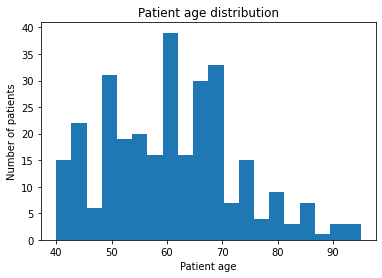

In [21]:
plt.hist(df['age'], bins=20)
plt.title('Patient age distribution')
plt.xlabel('Patient age')
plt.ylabel('Number of patients')

<AxesSubplot:xlabel='age', ylabel='Count'>

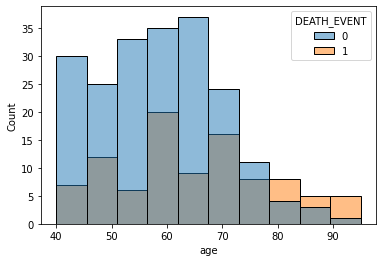

In [22]:
sns.histplot(data=df, x="age", hue="DEATH_EVENT")

Add histogram for age  by sex for age distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

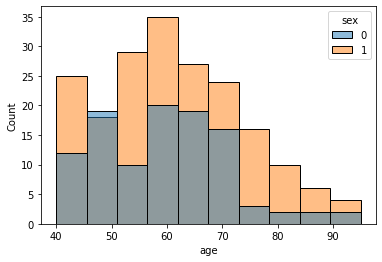

In [23]:
sns.histplot(data=df, x="age", hue="sex")

From this graph it is apparent that there were more male patients in this study than women. This makes sense as men 
experience adverse heart events more frequently than women, although since heart attack symptoms differ in women 
and have been studied less rigorously, these rates might be flexible. 

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

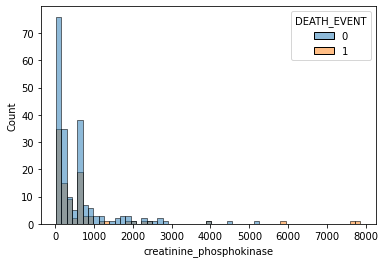

In [24]:
sns.histplot(data=df, x="creatinine_phosphokinase", hue="DEATH_EVENT")

Low levels of creatinine phosphokinase are associated more closely with patients that did not die. 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

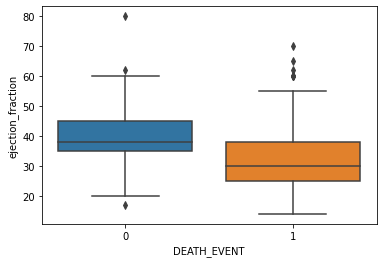

In [25]:
sns.boxplot(x= 'DEATH_EVENT', y='ejection_fraction', data = df)

You can see that the mean value for the ejection fraction, or the amount of blood pumped out by the heart is higher
in patients that did not die. The ejection fraction is lower in patients that did die. 

<AxesSubplot:xlabel='platelets', ylabel='Count'>

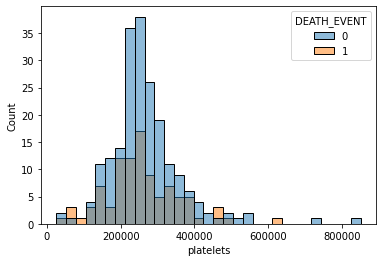

In [26]:
sns.histplot(data=df, x="platelets", hue="DEATH_EVENT")

Platelet levels do seem to differ greatly in patients that died versus patients that did not die, just from looking
at this histogram. 

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

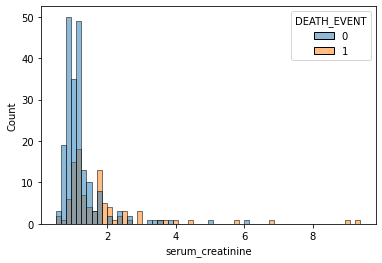

In [27]:
sns.histplot(data=df, x="serum_creatinine", hue="DEATH_EVENT")

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

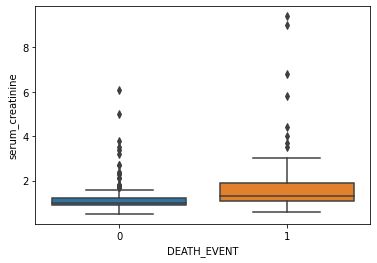

In [28]:
sns.boxplot(x= 'DEATH_EVENT', y='serum_creatinine', data = df)

You can see that serum creatinine levels are slightly higher in patients that died. 

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

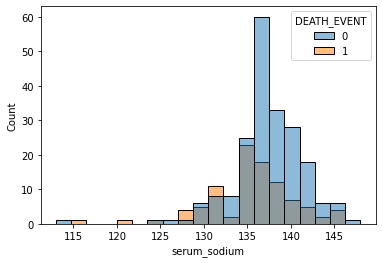

In [29]:
sns.histplot(data=df, x="serum_sodium", hue="DEATH_EVENT")

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

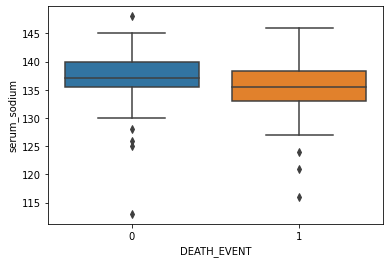

In [30]:
sns.boxplot(x= 'DEATH_EVENT', y='serum_sodium', data = df)

There is not a huge amount of difference in the amounts of serum sodium between patients who died and did not die, 
however it seems like serum sodium concentrations are slightly lower in patients that died. 

Based on the eploratory data analysis, I am most interested in seeing how the age, serum creatinine levels, and 
ejection fraction affect the death event outcome. It appears that older patients are more likely to die, and older
men are more likely to die than older women. Increased age seems to be associated with higher rates of death, 
lower levels of serum creatinine seem to be associated with lower rates of death, and a higher ejection fraction
seems to be associated with lower rates of death. According to the box plot and histograms I created, higher levels
of serum sodium may also be associated with lower rates of death I will be building several models to see which 
variables best explain the death event outcome. 

Normalize columns here, make histograms look better 

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
scaler.transform(df)

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -6.87681906e-01, -1.62950241e+00,  1.45416070e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -6.87681906e-01, -1.60369074e+00,  1.45416070e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         1.45416070e+00, -1.59078490e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -6.87681906e-01,  1.90669738e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         1.45416070e+00,  1.93250906e+00, -6.87681906e-01],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         1.45416070e+00,  1.99703825e+00, -6.87681906e-01]])

In [32]:
y = df['DEATH_EVENT']
X = df.drop(['DEATH_EVENT'], axis=1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np

clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.767
Random Forest: f1-score=0.755


12


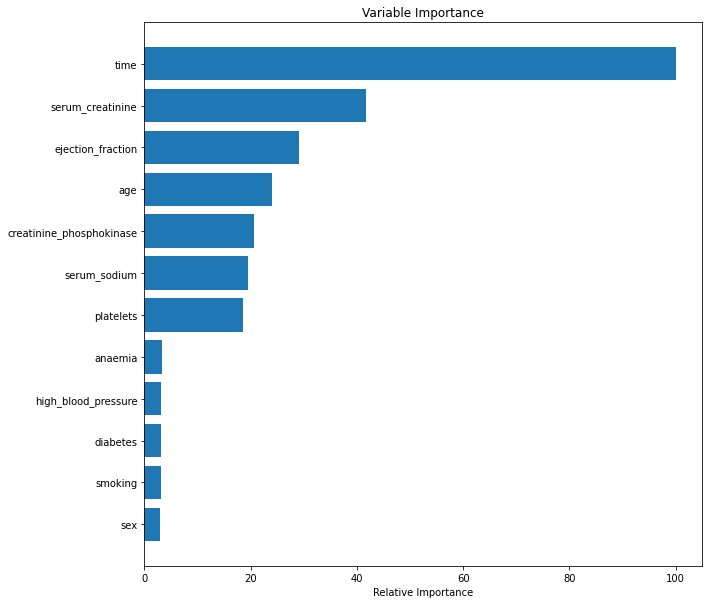

In [43]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [46]:
from sklearn.tree import DecisionTreeClassifier

entr_model = DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [47]:
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus

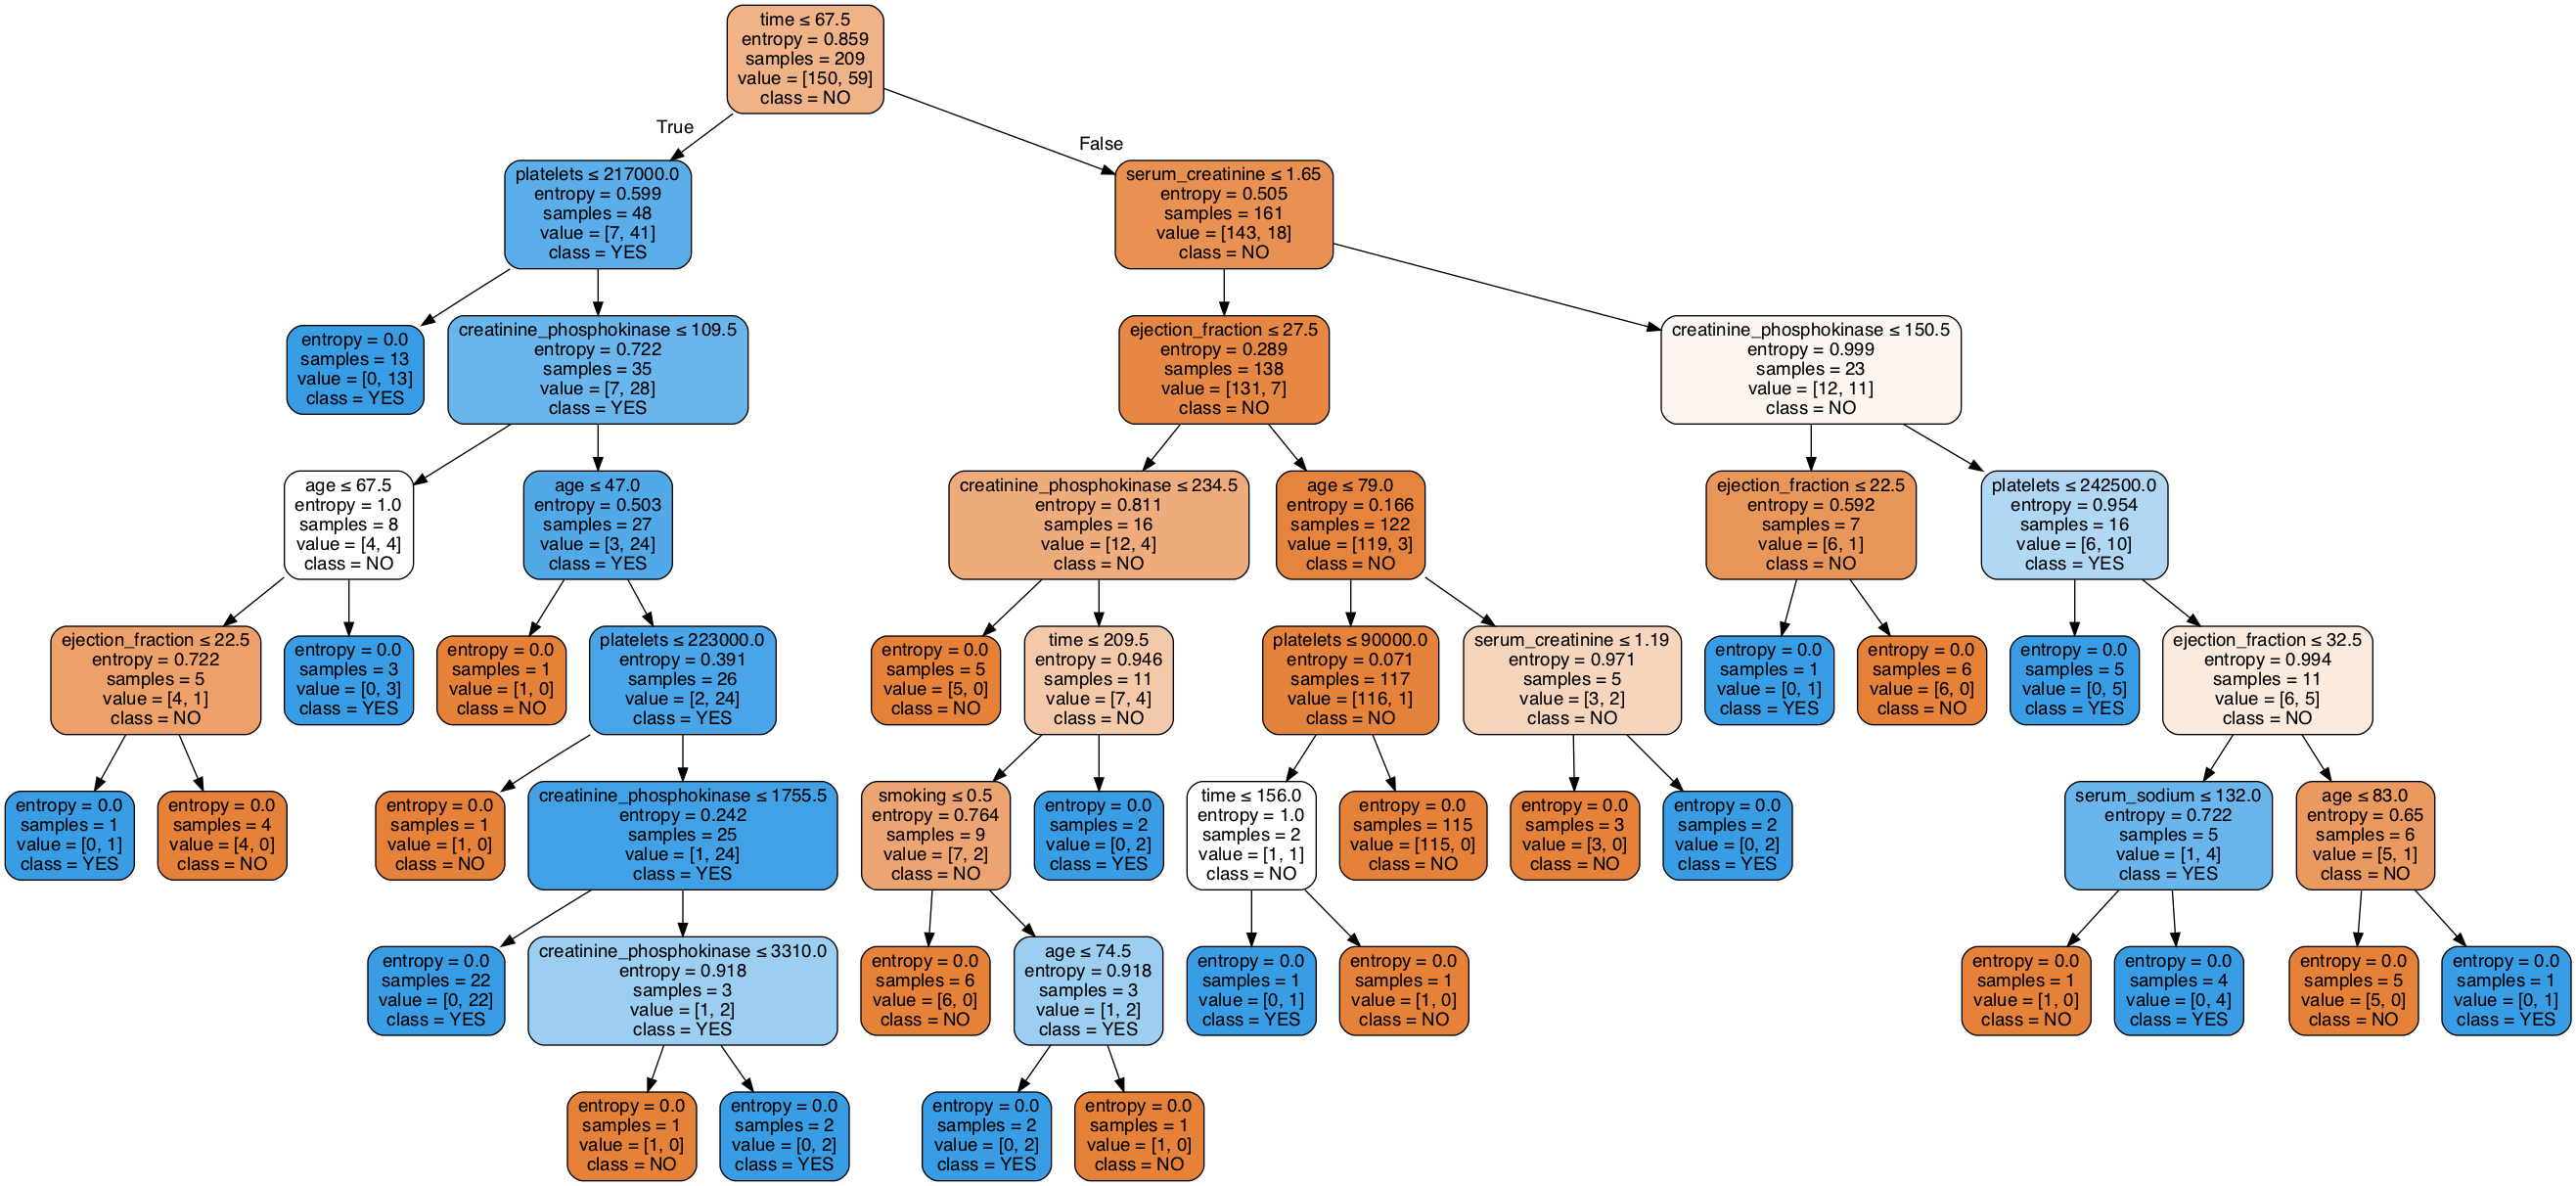

In [48]:
dot_data = StringIO()

tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [49]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.7222222222222222
Balanced accuracy: 0.6947985721570628


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label='YES' is not a valid label: array([0, 1])

This decision tree model with no max depth does not have a high degree of accuracy. It is slightly less accurate 
than the Random Forest model. 

In [50]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

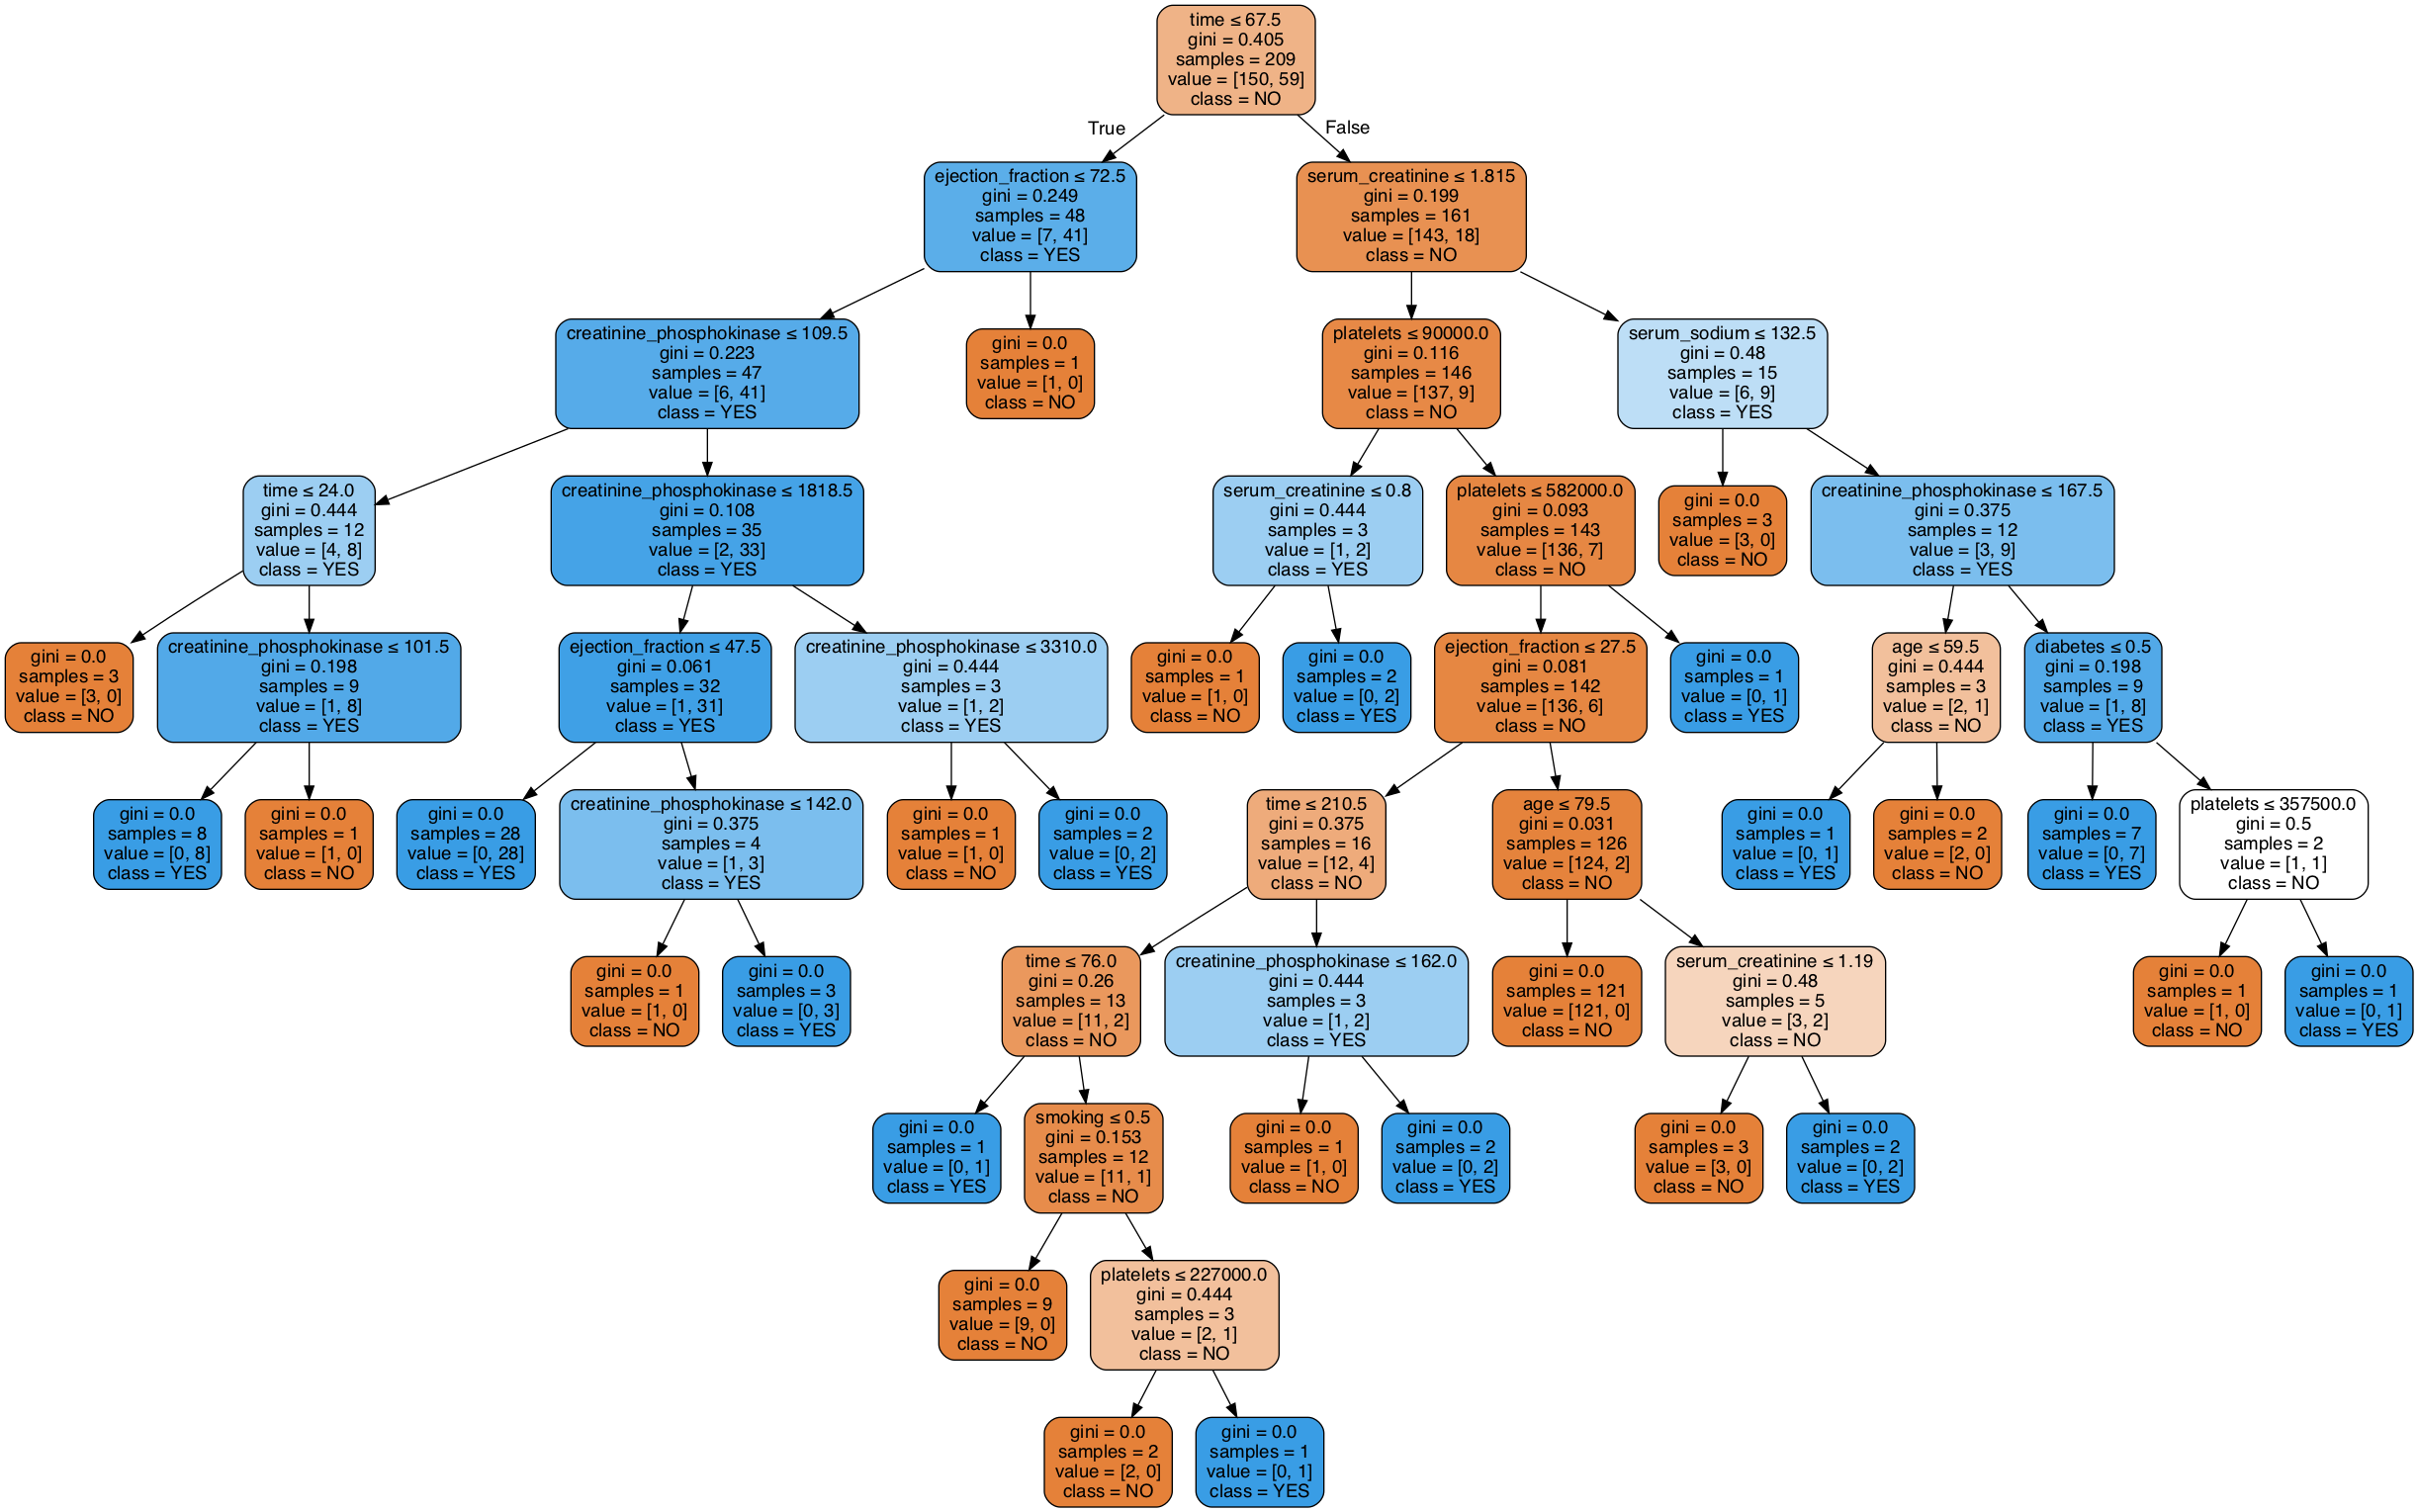

In [51]:
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [52]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.6888888888888889
Balanced accuracy: 0.6624171341152474


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label='YES' is not a valid label: array([0, 1])

In [53]:
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

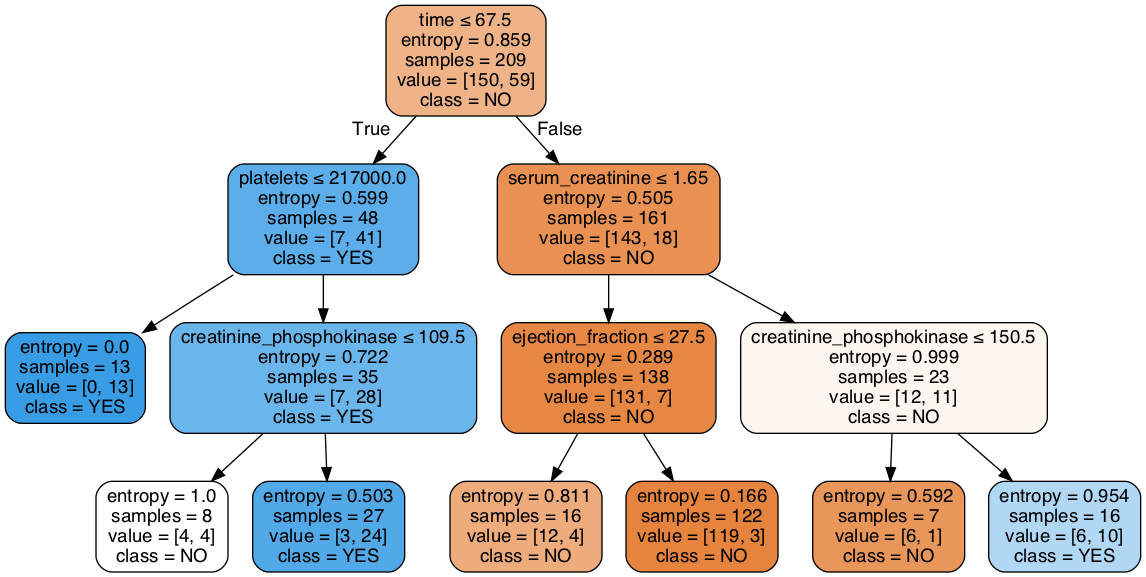

In [54]:
dot_data = StringIO()
tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [55]:
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.7666666666666667
Balanced accuracy: 0.7406935237123917


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label='YES' is not a valid label: array([0, 1])

In [56]:
gini_model2 = tree.DecisionTreeClassifier(criterion="gini", max_depth = 3, random_state = 1234)
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

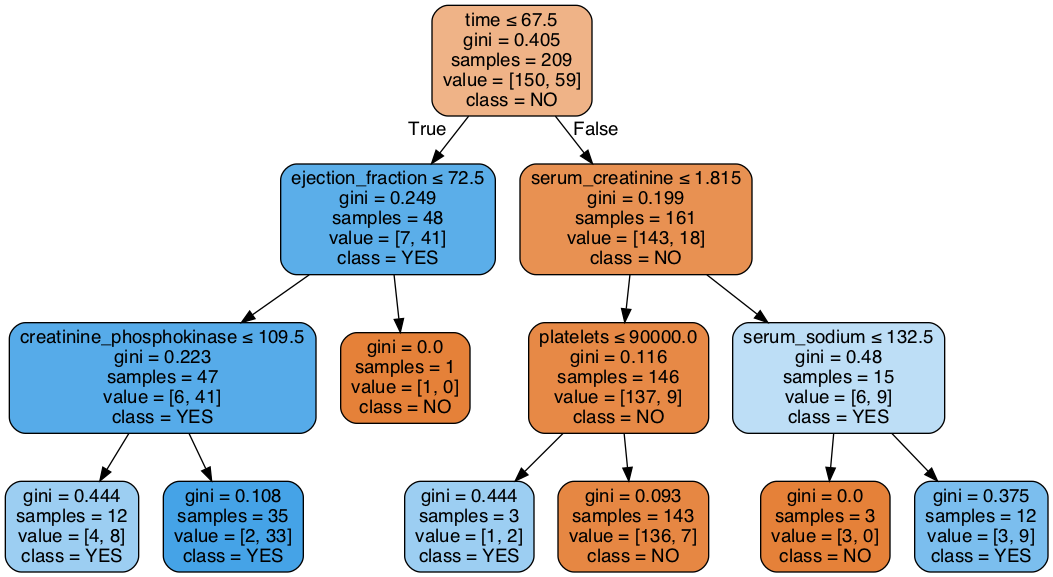

In [57]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [58]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.7222222222222222
Balanced accuracy: 0.6947985721570628


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1305: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label='YES' is not a valid label: array([0, 1])